In [5]:
%matplotlib notebook

import cv2
import matplotlib.pyplot as plt
import signal
import numpy as np
import time

In [6]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

In [7]:
face_cascade = cv2.CascadeClassifier('/usr/local/Cellar/opencv/2.4.13.2/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/usr/local/Cellar/opencv/2.4.13.2/share/OpenCV/haarcascades/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('/usr/local/Cellar/opencv/2.4.13.2/share/OpenCV/haarcascades/haarcascade_smile.xml')

<IPython.core.display.Javascript object>


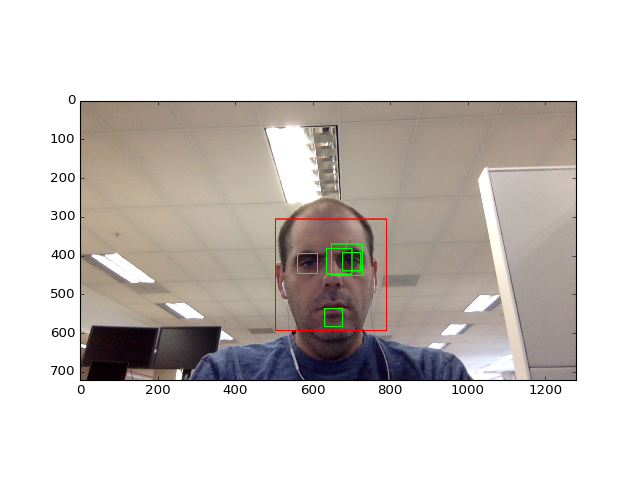

here


In [8]:
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, img = vc.read()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(img)    
else:
    is_capturing = False

signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False
while is_capturing:
    is_capturing, img = vc.read()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
   
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
       
        smiles = smile_cascade.detectMultiScale(roi_gray,scaleFactor= 1.7,minNeighbors=22,minSize=(100, 50),flags=cv2.cv.CV_HAAR_SCALE_IMAGE)
        for (sx,sy,sw,sh) in smiles:
            cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,0,255),2)
      
      
    webcam_preview.set_data(img)
    plt.draw()
    
    try:    # Avoids a NotImplementedError caused by `plt.pause`
        plt.pause(0.05)
    except Exception:
        pass

    if is_interrupted:
        print ("here")
        vc.release()
        break